In [58]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [59]:
from nbodykit.lab import BigFileCatalog
import illustris_python as il

In [60]:
import mass_function_library as MFL

In [61]:
# low res for jupyter
basePathFastPM = '/global/cfs/cdirs/cmb/data/halfdome/stampede2_3750Mpch_6144cube/lower_res/ode_04_res/rfof_proc4096_nc2048_size5000_nsteps60lin_ldr0_rcvtrue_fstnone_pnf2_lnf2_s100_dhf1.0000_tiled0.20_fll_elllim_10000_npix_8192_rfofkdt_8'

In [62]:
basePathTNG = os.environ['SCRATCH']+'/TNG300-1-Dark/output'

In [63]:
redshifts = [0,1,2,3]
redshift2seedTNG = {0:99, 1:50, 2:33, 3:25}
V_fastpm = (3.75e3)**3
V_tng = 205**3

In [64]:
# define bins
a=1
rfof = BigFileCatalog(basePathFastPM + '/rfof_%.4f' % a, dataset='RFOF')
M_fastpm = rfof['Length'].compute() * rfof.attrs['M0']

delta_mass = rfof.attrs['M0'] / 4**3   # correct for final res
mass_min = delta_mass * 22
print(min(M_fastpm), mass_min)
    
delta_bin = 0.3 # log10(delta_mass*10)
bin_edges = np.arange(np.log10(mass_min), np.log10(mass_min)+3, delta_bin)
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2

/global/common/software/m3058/abayer/conda/nbodykit/lib/python3.6/site-packages/bigfile/__init__.py:358: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return pyxbigfile.Dataset.__init__(self, file, dtype=dtype, size=size)


KeyboardInterrupt: 

0
Delta= 200.0
A= 0.186
a= 1.47
b= 2.57
c= 1.19
1
Delta= 200.0
A= 0.16879856288899192
a= 1.4101182554081386
b= 2.5510527497315656
c= 1.19
2
Delta= 200.0
A= 0.15948357730195356
a= 1.3762269540827117
b= 2.5400341404964757
c= 1.19


/global/common/software/m3058/abayer/conda/nbodykit/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


3
Delta= 200.0
A= 0.1531879292117686
a= 1.3526758464185664
b= 2.53224518751478
c= 1.19


/global/common/software/m3058/abayer/conda/nbodykit/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


0
1
2


/global/common/software/m3058/abayer/conda/nbodykit/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


3


/global/common/software/m3058/abayer/conda/nbodykit/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


0
1
2


/global/common/software/m3058/abayer/conda/nbodykit/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


3


/global/common/software/m3058/abayer/conda/nbodykit/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


0
1
2


/global/common/software/m3058/abayer/conda/nbodykit/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


3


/global/common/software/m3058/abayer/conda/nbodykit/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


0
1
2


/global/common/software/m3058/abayer/conda/nbodykit/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


3


/global/common/software/m3058/abayer/conda/nbodykit/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


0
1
2


/global/common/software/m3058/abayer/conda/nbodykit/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


3


/global/common/software/m3058/abayer/conda/nbodykit/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


0
1
2


/global/common/software/m3058/abayer/conda/nbodykit/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


3


/global/common/software/m3058/abayer/conda/nbodykit/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


0
1
2


/global/common/software/m3058/abayer/conda/nbodykit/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


3


/global/common/software/m3058/abayer/conda/nbodykit/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


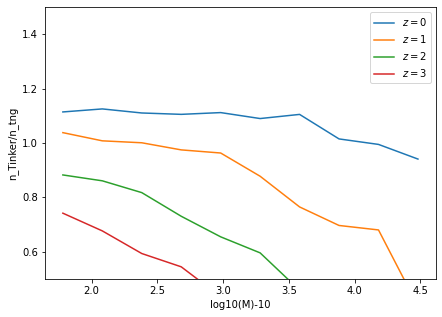

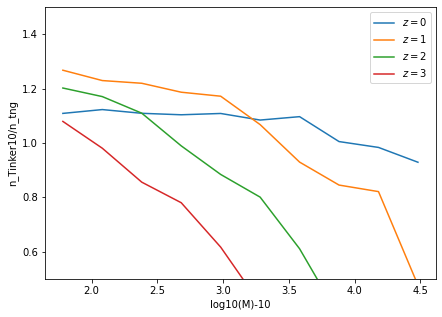

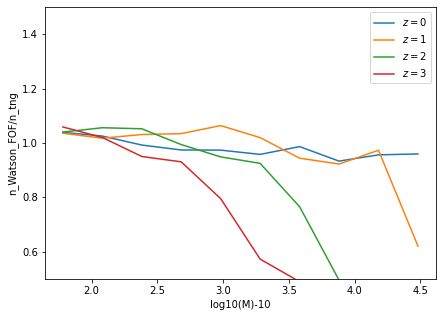

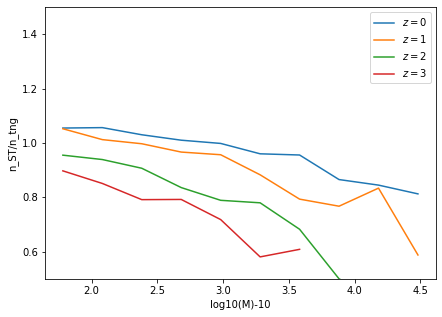

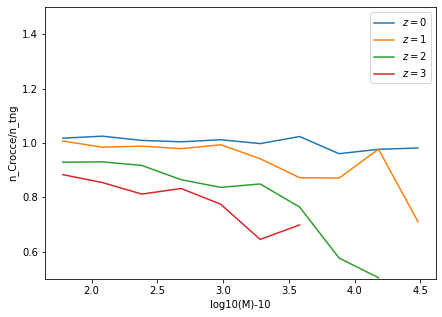

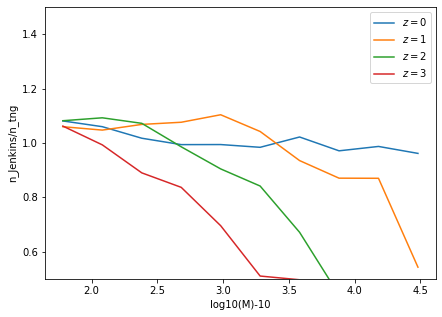

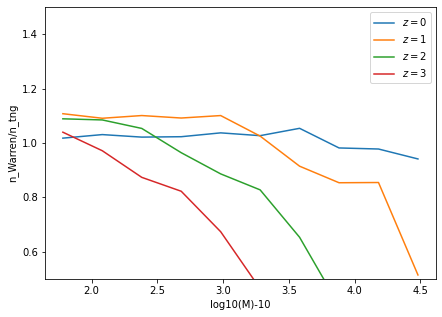

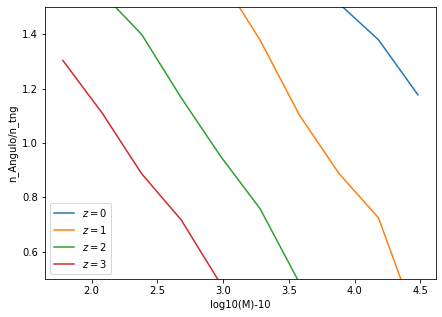

In [67]:
# theories vs tng:
for author in ['Tinker', 'Tinker10', 'Watson_FOF', 'ST', 'Crocce', 'Jenkins', 'Warren', 'Angulo']:
    plt.figure(figsize=(7,5))
    for iz,z in enumerate(redshifts):
        #redshift; only used for Tinker, Tinker10 and Crocce  -- what about watson? I guess need linear power...
        print(z)

        # thoery from pylians:
        # halo mass function parameters
        f_Pk   = '/global/homes/a/abayer/source/class/output/tng/z%d_pk.dat' % (z+1)  #file with linear Pk
        OmegaM = 0.3089 #/ (1+z)**3
        author = author
        bins   = 1000  #number of bins to use for Pk
        delta  = 200.0  #overdensity; only for Tinker and Tinker10

        # read linear matter Pk
        k, Pk = np.loadtxt(f_Pk, unpack=True)

        # compute halo mass function
        HMF_theory = MFL.MF_theory(k, Pk, OmegaM, 10**(bin_centers+10), author, bins, z, delta)


        # load tng halos
        M_tng = il.groupcat.loadHalos(basePathTNG,redshift2seedTNG[z],fields='GroupMass')
        N_tng, _ = np.histogram(np.log10(M_tng), bins=bin_edges, density=False)
        HMF_tng = N_tng / 205**3 / (10**(bin_edges[1:]+10) - 10**(bin_edges[:-1]+10))

        plt.plot(bin_centers, HMF_theory/HMF_tng, label=r'$z=%d$'%z)

    plt.ylim(0.5,1.5)
    plt.xlabel('log10(M)-10')
    plt.ylabel('n_%s/n_tng'%author)
    plt.legend()
    plt.savefig(author+'.png')

In [54]:
HMF_tng

array([4.64883551e-15, 9.17304476e-16, 1.63451423e-16, 2.28772592e-17,
       2.79779013e-18, 2.75281806e-19, 1.29344744e-20, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [55]:
HMF_theory

array([6.05953579e-15, 1.01731384e-15, 1.44811140e-16, 1.63911290e-17,
       1.34562311e-18, 6.99545307e-20, 1.87265327e-21, 1.87506942e-23,
       4.27415582e-26, 1.00943082e-29])

In [5]:
font = {'size'   : 14, 'family':'Latin Modern Roman Demi'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
#matplotlib.rcParams['text.usetex'] = True
#matplotlib.mathtext.rcParams['legend.fontsize']='small'
matplotlib.mathtext.rcParams["mathtext.fontset"]='cm'
plt.rcParams['font.family'] = 'cmb10'

In [6]:
"""This grabs the snapshot of DM halo (cluster_var) and particle map (DM_var) cateloge, respectively"""
import glob
from os.path import join
path_data = '/global/cfs/cdirs/cmb/data/halfdome/stampede2_3750Mpch_6144cube/final_res'
cat_lastname = '3750Mpc_2048node_seed_'
folder_lastname = '/rfof_proc131072_nc6144_size3750_'
#folder_finame = 'npix_4096/'
#clustername_var = 'rfof_'
cluster_var = [x for x in glob.glob(join(path_data,cat_lastname+'*'+folder_lastname+'*'))]
cluster_var.sort()
#final_cat = '/scratch/01318/yczhong7/fastpm/yici/fiducial_run/rfof_proc131072_nc6144_size3750_nsteps60lin_ldr0_rcvfalse_fstnone_pnf2_lnf2_s100_dhf1.0000_tiled0.20_fll_elllim_10000_npix_8192_rfofkdt_8'
#cluster_var = [final_cat] #[cluster_var_ori[0],cluster_var_ori[2],cluster_var_ori[1],cluster_var_ori[3],final_cat]
#cluster_var.reverse()
#cluster_var = sorted(cluster_var_ori)
print(cluster_var)

['/global/cfs/cdirs/cmb/data/halfdome/stampede2_3750Mpch_6144cube/final_res/3750Mpc_2048node_seed_100/rfof_proc131072_nc6144_size3750_nsteps60lin_ldr0_rcvfalse_fstnone_pnf2_lnf2_s100_dhf1.0000_tiled0.20_fll_elllim_10000_npix_8192_rfofkdt_8', '/global/cfs/cdirs/cmb/data/halfdome/stampede2_3750Mpch_6144cube/final_res/3750Mpc_2048node_seed_102/rfof_proc131072_nc6144_size3750_nsteps60lin_ldr0_rcvfalse_fstnone_pnf2_lnf2_s102_dhf1.0000_tiled0.20_fll_elllim_10000_npix_8192_rfofkdt_8', '/global/cfs/cdirs/cmb/data/halfdome/stampede2_3750Mpch_6144cube/final_res/3750Mpc_2048node_seed_104/rfof_proc131072_nc6144_size3750_nsteps60lin_ldr0_rcvfalse_fstnone_pnf2_lnf2_s104_dhf1.0000_tiled0.20_fll_elllim_10000_npix_8192_rfofkdt_8', '/global/cfs/cdirs/cmb/data/halfdome/stampede2_3750Mpch_6144cube/final_res/3750Mpc_2048node_seed_106/rfof_proc131072_nc6144_size3750_nsteps60lin_ldr0_rcvfalse_fstnone_pnf2_lnf2_s106_dhf1.0000_tiled0.20_fll_elllim_10000_npix_8192_rfofkdt_8', '/global/cfs/cdirs/cmb/data/halfdom

In [7]:
tngfile_var1 = [x for x in glob.glob(join("/pscratch/sd/y/yczhong/TNG_300",'z_'+'*'))] 
tngfile_var1.sort()
group_var1 = [x for x in glob.glob(join("/pscratch/sd/y/yczhong/TNG_300",'z_'+'*'+'/groups_'+'*'))]
group_var1.sort()
fields = ['GroupPos','GroupMass','GroupMassType']
tngfile_var = tngfile_var1[:]
group_var = group_var1[:]

In [8]:
tngfile_var1, group_var1

(['/pscratch/sd/y/yczhong/TNG_300/z_0',
  '/pscratch/sd/y/yczhong/TNG_300/z_1',
  '/pscratch/sd/y/yczhong/TNG_300/z_2',
  '/pscratch/sd/y/yczhong/TNG_300/z_3',
  '/pscratch/sd/y/yczhong/TNG_300/z_4'],
 ['/pscratch/sd/y/yczhong/TNG_300/z_0/groups_099',
  '/pscratch/sd/y/yczhong/TNG_300/z_1/groups_050',
  '/pscratch/sd/y/yczhong/TNG_300/z_2/groups_033',
  '/pscratch/sd/y/yczhong/TNG_300/z_3/groups_025',
  '/pscratch/sd/y/yczhong/TNG_300/z_4/groups_021'])

/global/cfs/cdirs/cmb/data/halfdome/stampede2_3750Mpch_6144cube/final_res/3750Mpc_2048node_seed_100/rfof_proc131072_nc6144_size3750_nsteps60lin_ldr0_rcvfalse_fstnone_pnf2_lnf2_s100_dhf1.0000_tiled0.20_fll_elllim_10000_npix_8192_rfofkdt_8
['./rfof_1.0000', './rfof_0.6667', './rfof_0.5000', './rfof_0.4000', './rfof_0.3333', './rfof_0.2857', './rfof_0.2500', './rfof_0.2222', './rfof_0.2000']
./rfof_1.0000


PermissionError: [Errno 13] Permission denied: './seed_100_z_0.0.csv'

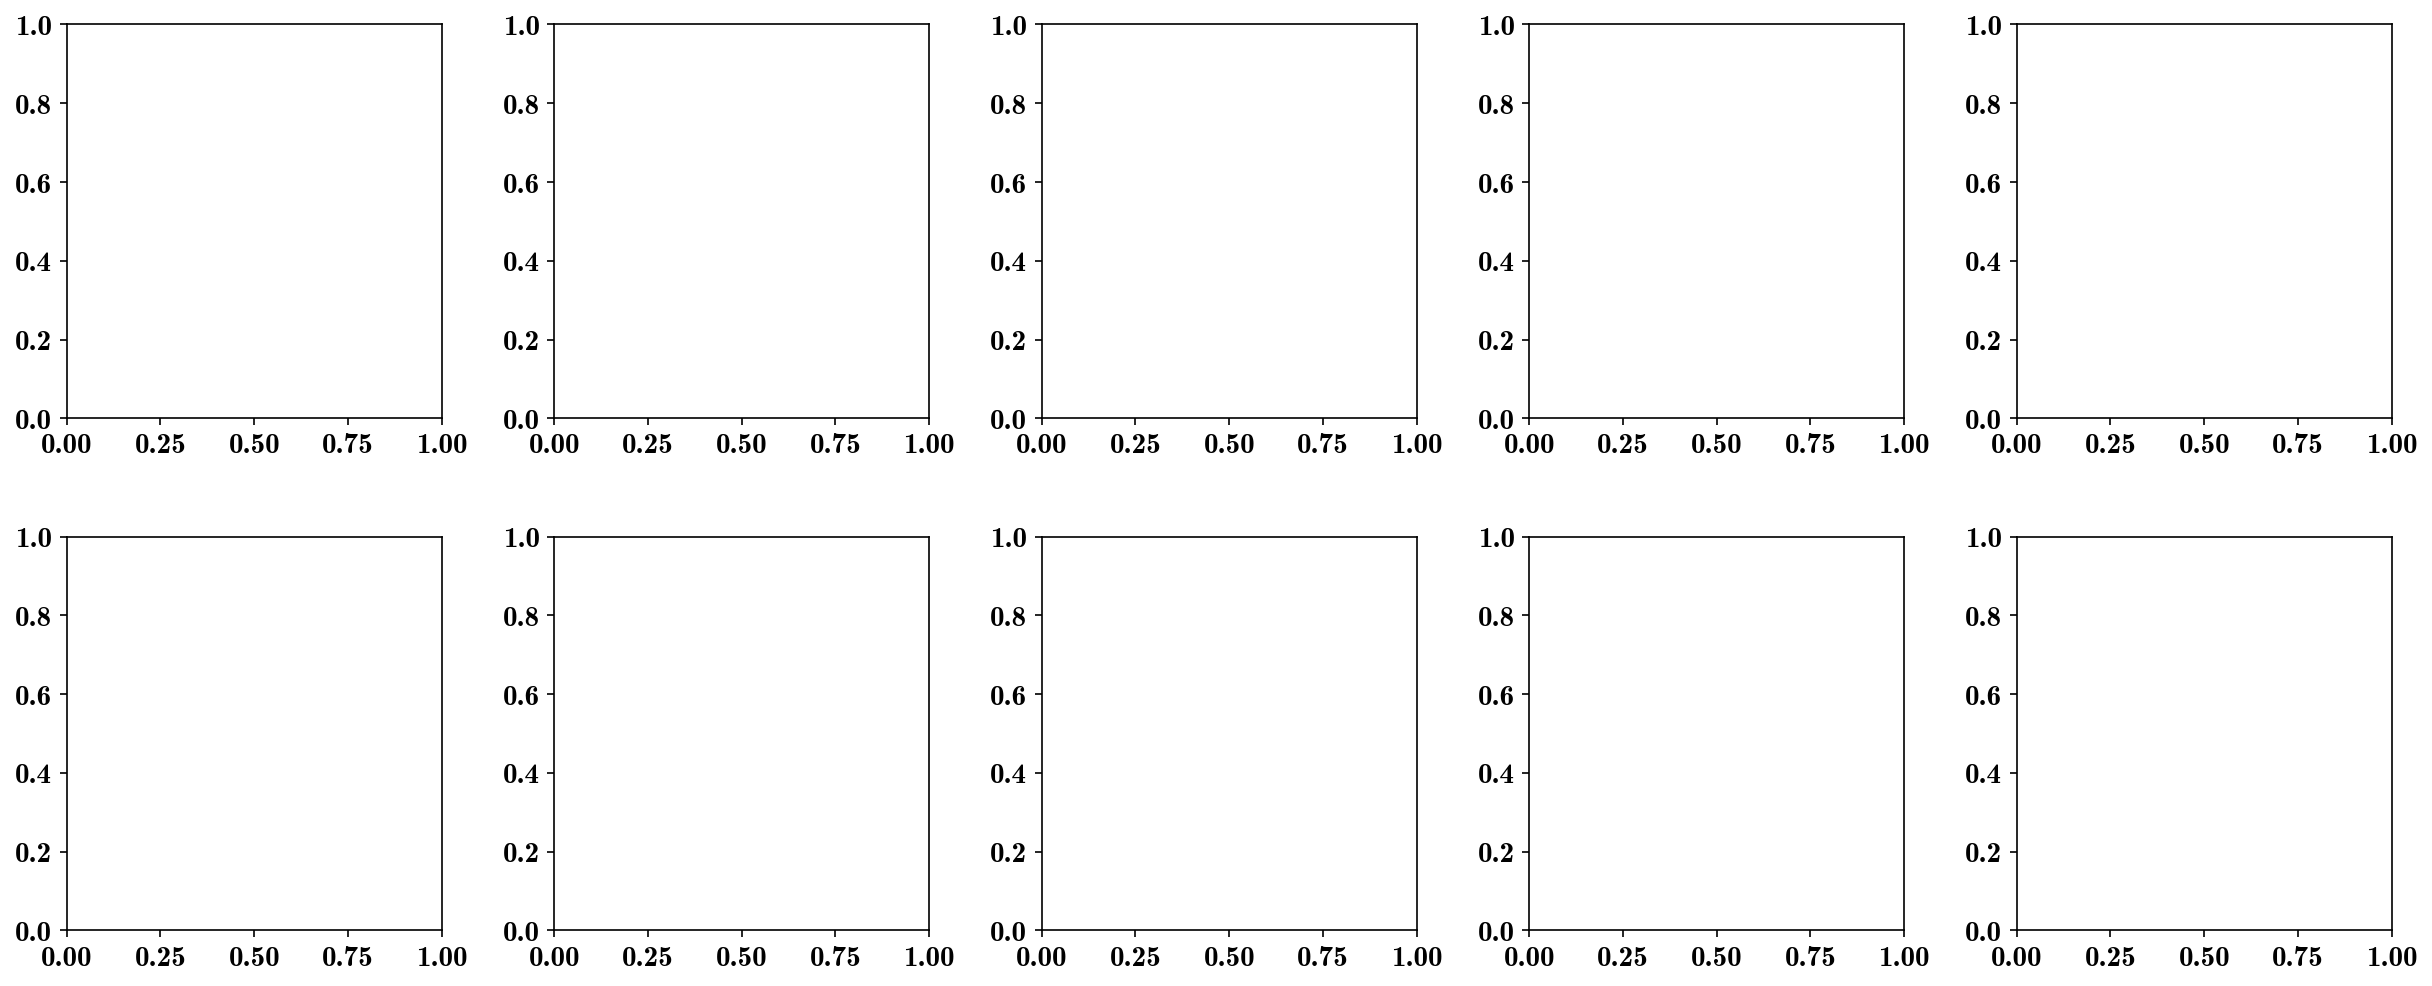

In [13]:
"""This compares the mass function at different redshift for simulation results and theory"""
fig, host = plt.subplots(2,5,figsize=(20,8),dpi=150)
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.3)
z_index = [0,2,4,6,8]
redshift = 0.
for i, redsh in enumerate(z_index):
    average_mass_tot = 0
    dndM1_tot = 0
    minimum_mass_tot = 0
    maximum_mass_tot = 0
    
    tng_average_mass_tot = 0
    tng_dndM1_tot =0
    
    groupnum = np.int64(group_var[i][-2:])
    subhalos = il.groupcat.loadHalos(tngfile_var[i],groupnum,fields=fields)
    halomass_the = subhalos['GroupMass']* 1e10
    #print(subhalos['GroupMass'])
    #print(subhalos['GroupMassType'])
    
    for kk, filena in enumerate(cluster_var):
        print(filena)
        with cd("%s"%(filena)):
            files_var = [x for x in glob.glob(join("./",'rfof_'+'*'))]
            files_var.sort()
            files_var.reverse()
            print(files_var)
            rfof = BigFileCatalog(files_var[redsh], dataset='RFOF')
            print(files_var[redsh])
            
            rfof['Mass']=rfof['Length'] * rfof.attrs['M0'] 
            redshift = (1 / rfof.attrs['ScalingFactor'][0]) - 1
            minimum_mass = log10(np.min(rfof['Mass'].compute()))+10
            maximum_mass = log10(np.max(rfof['Mass'].compute()))+10

            n1, bins1 = histogram(log10(rfof['Mass'].compute())+10, range=(minimum_mass,maximum_mass),bins=20)  #mass function: number of halos per log mass bin
            average_mass = np.zeros((1,len(bins1)-1))
            for j in range(len(bins1)-1):
                average_mass[0][j] = (10**bins1[j+1] + 10**bins1[j]) / 2
                
            bins_width = np.zeros((1,len(bins1)-1))
            for j in range(len(bins1)-1):
                bins_width[0][j] = 10**bins1[j+1] - 10**bins1[j]
            dndM1 = n1  / (bins_width * rfof.attrs['BoxSize']**3)
            
            with open('./%s_z_%.1f.csv'%(filena[91:99],redshift), 'a', newline='') as csvfile:
                writer = csv.writer(csvfile)
                for index, dndm1 in enumerate(dndM1.T):
                    param1 = np.append(average_mass.T[index],dndm1)
                    writer.writerow(param1)
                csvfile.close()
            
            n_th, bins_th = histogram(log10(halomass_the), range=(minimum_mass,maximum_mass),bins=20)
            average_mass_tng = np.zeros((1,len(bins_th)-1))
            for j in range(len(bins_th)-1):
                average_mass_tng[0][j] = (10**bins_th[j+1] + 10**bins_th[j]) / 2
                
            bins_width_tng = np.zeros((1,len(bins_th)-1))
            for j in range(len(bins_th)-1):
                bins_width_tng[0][j] = 10**bins_th[j+1] - 10**bins_th[j]
               
            dndMtng = n_th  / (bins_width_tng * (302.6*0.6774)**3)
            
            with open('./%s_tng_z_%.1f.csv'%(filena[91:99],i), 'a', newline='') as csvfile:
                writer = csv.writer(csvfile)
                for index_tng, dndm_tng in enumerate(dndMtng[0]):
                    param1 = np.append(average_mass_tng[0][index_tng],dndm_tng)
                    writer.writerow(param1)
                csvfile.close()
            
            average_mass_tot += average_mass
            dndM1_tot += dndM1
            minimum_mass_tot += minimum_mass
            maximum_mass_tot += maximum_mass
            
            tng_average_mass_tot += average_mass_tng
            tng_dndM1_tot += dndMtng
    
    print(len(cluster_var))
    average_mass_tot /= len(cluster_var)
    dndM1_tot /= len(cluster_var)
    tng_average_mass_tot /= len(cluster_var)
    tng_dndM1_tot /= len(cluster_var)
    minimum_mass_tot /= len(cluster_var)
    maximum_mass_tot /= len(cluster_var)
    
    with open('./z_%.1f.csv'%(redshift), 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        for index, dndm1 in enumerate(dndM1_tot.T):
            param1 = np.append(average_mass_tot.T[index],dndm1)
            writer.writerow(param1)
        csvfile.close()
    
    with open('./tng_z_%.1f.csv'%(i), 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        for index_tng, dndm_tng in enumerate(tng_dndM1_tot[0]):
            param1 = np.append(tng_average_mass_tot[0][index_tng],dndm_tng)
            writer.writerow(param1)
        csvfile.close()